In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [2]:
df = pd.read_csv('/content/telecom_churn.csv')

In [3]:
df.head

<bound method NDFrame.head of       Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1       2.70   
1         0           107                1         1       3.70   
2         0           137                1         0       0.00   
3         0            84                0         0       0.00   
4         0            75                0         0       0.00   
...     ...           ...              ...       ...        ...   
3328      0           192                1         1       2.67   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   
3332      0            74                1         1       3.70   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0                 1    265.1       110           89.0        9.87      10.0  
1        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [7]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

<Axes: >

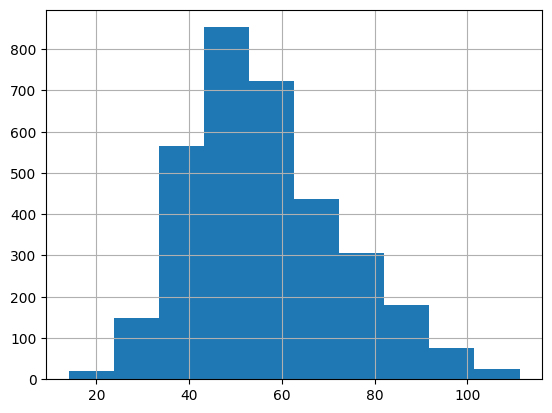

In [8]:
import matplotlib as plt

df['MonthlyCharge'].hist()


<Axes: >

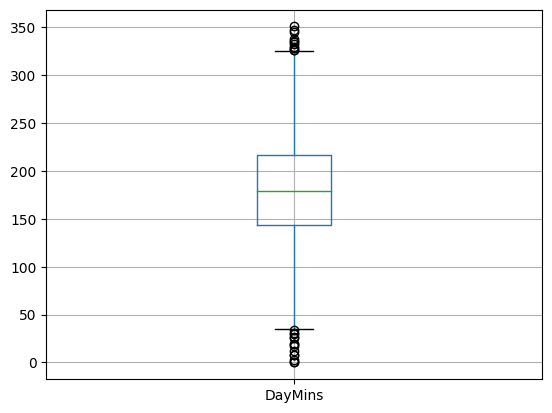

In [13]:
import matplotlib as plt
df.boxplot(column='DayMins')

<Axes: xlabel='DataUsage', ylabel='MonthlyCharge'>

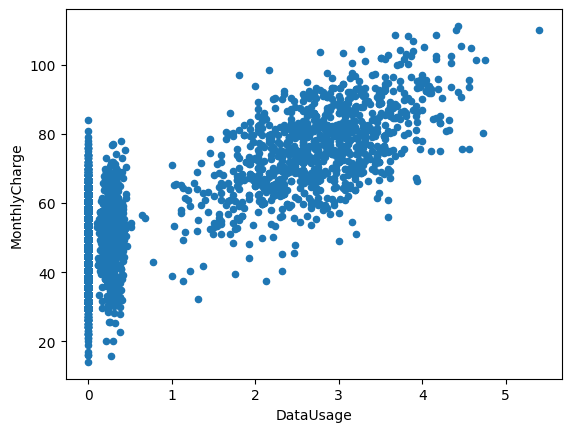

In [20]:
df.plot.scatter(x='DataUsage', y='MonthlyCharge')

In [24]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins', 'DataPlan_1'],
      dtype='object')

**EDA**

In [31]:
import seaborn as sns

<Axes: xlabel='Churn', ylabel='count'>

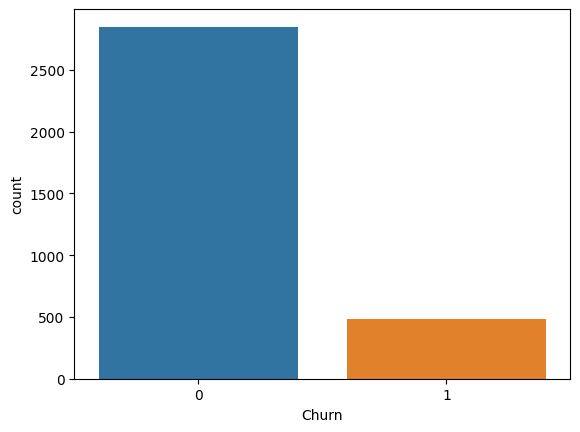

In [33]:
# Distribution of the target variable
sns.countplot(x = 'Churn', data = df)

<Axes: >

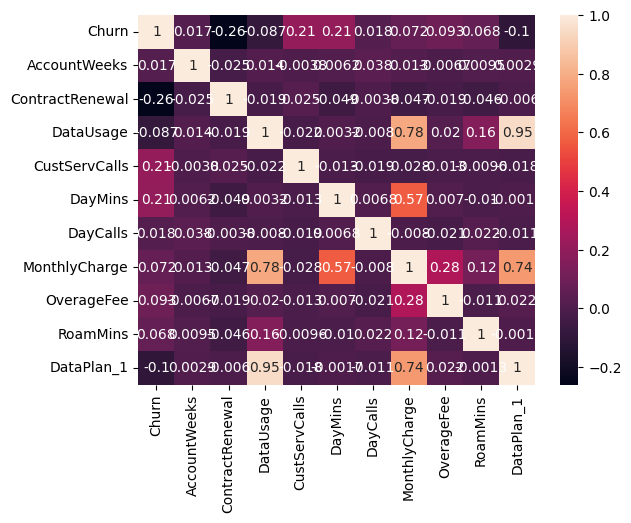

In [35]:
# Correlation matrix heatmap
corr = df.corr()
sns.heatmap(corr, annot = True)

<Axes: xlabel='AccountWeeks', ylabel='Count'>

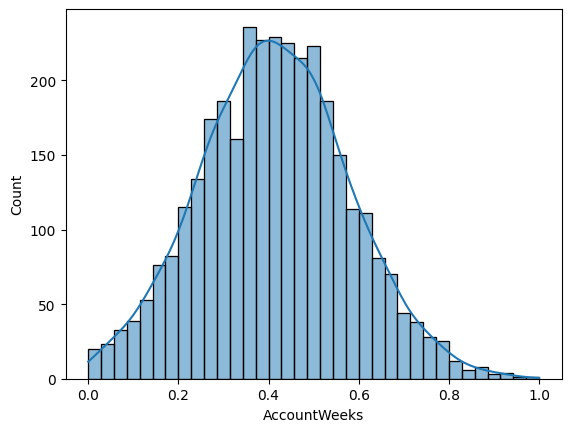

In [40]:
# Distribution of each feature
sns.histplot(df['AccountWeeks'], kde=True)

<Axes: xlabel='Churn', ylabel='DayMins'>

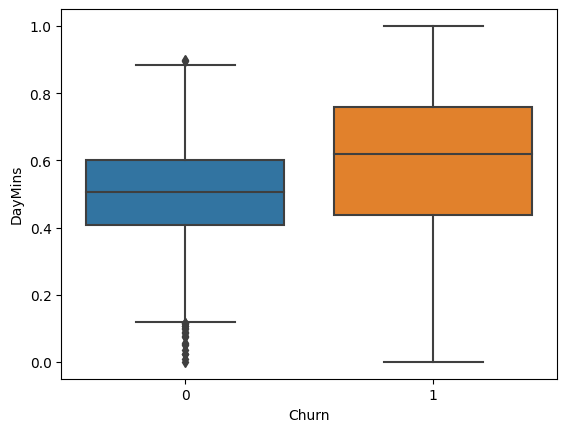

In [37]:
# Box plot of features by target variable
sns.boxplot(x='Churn', y='DayMins', data=df)

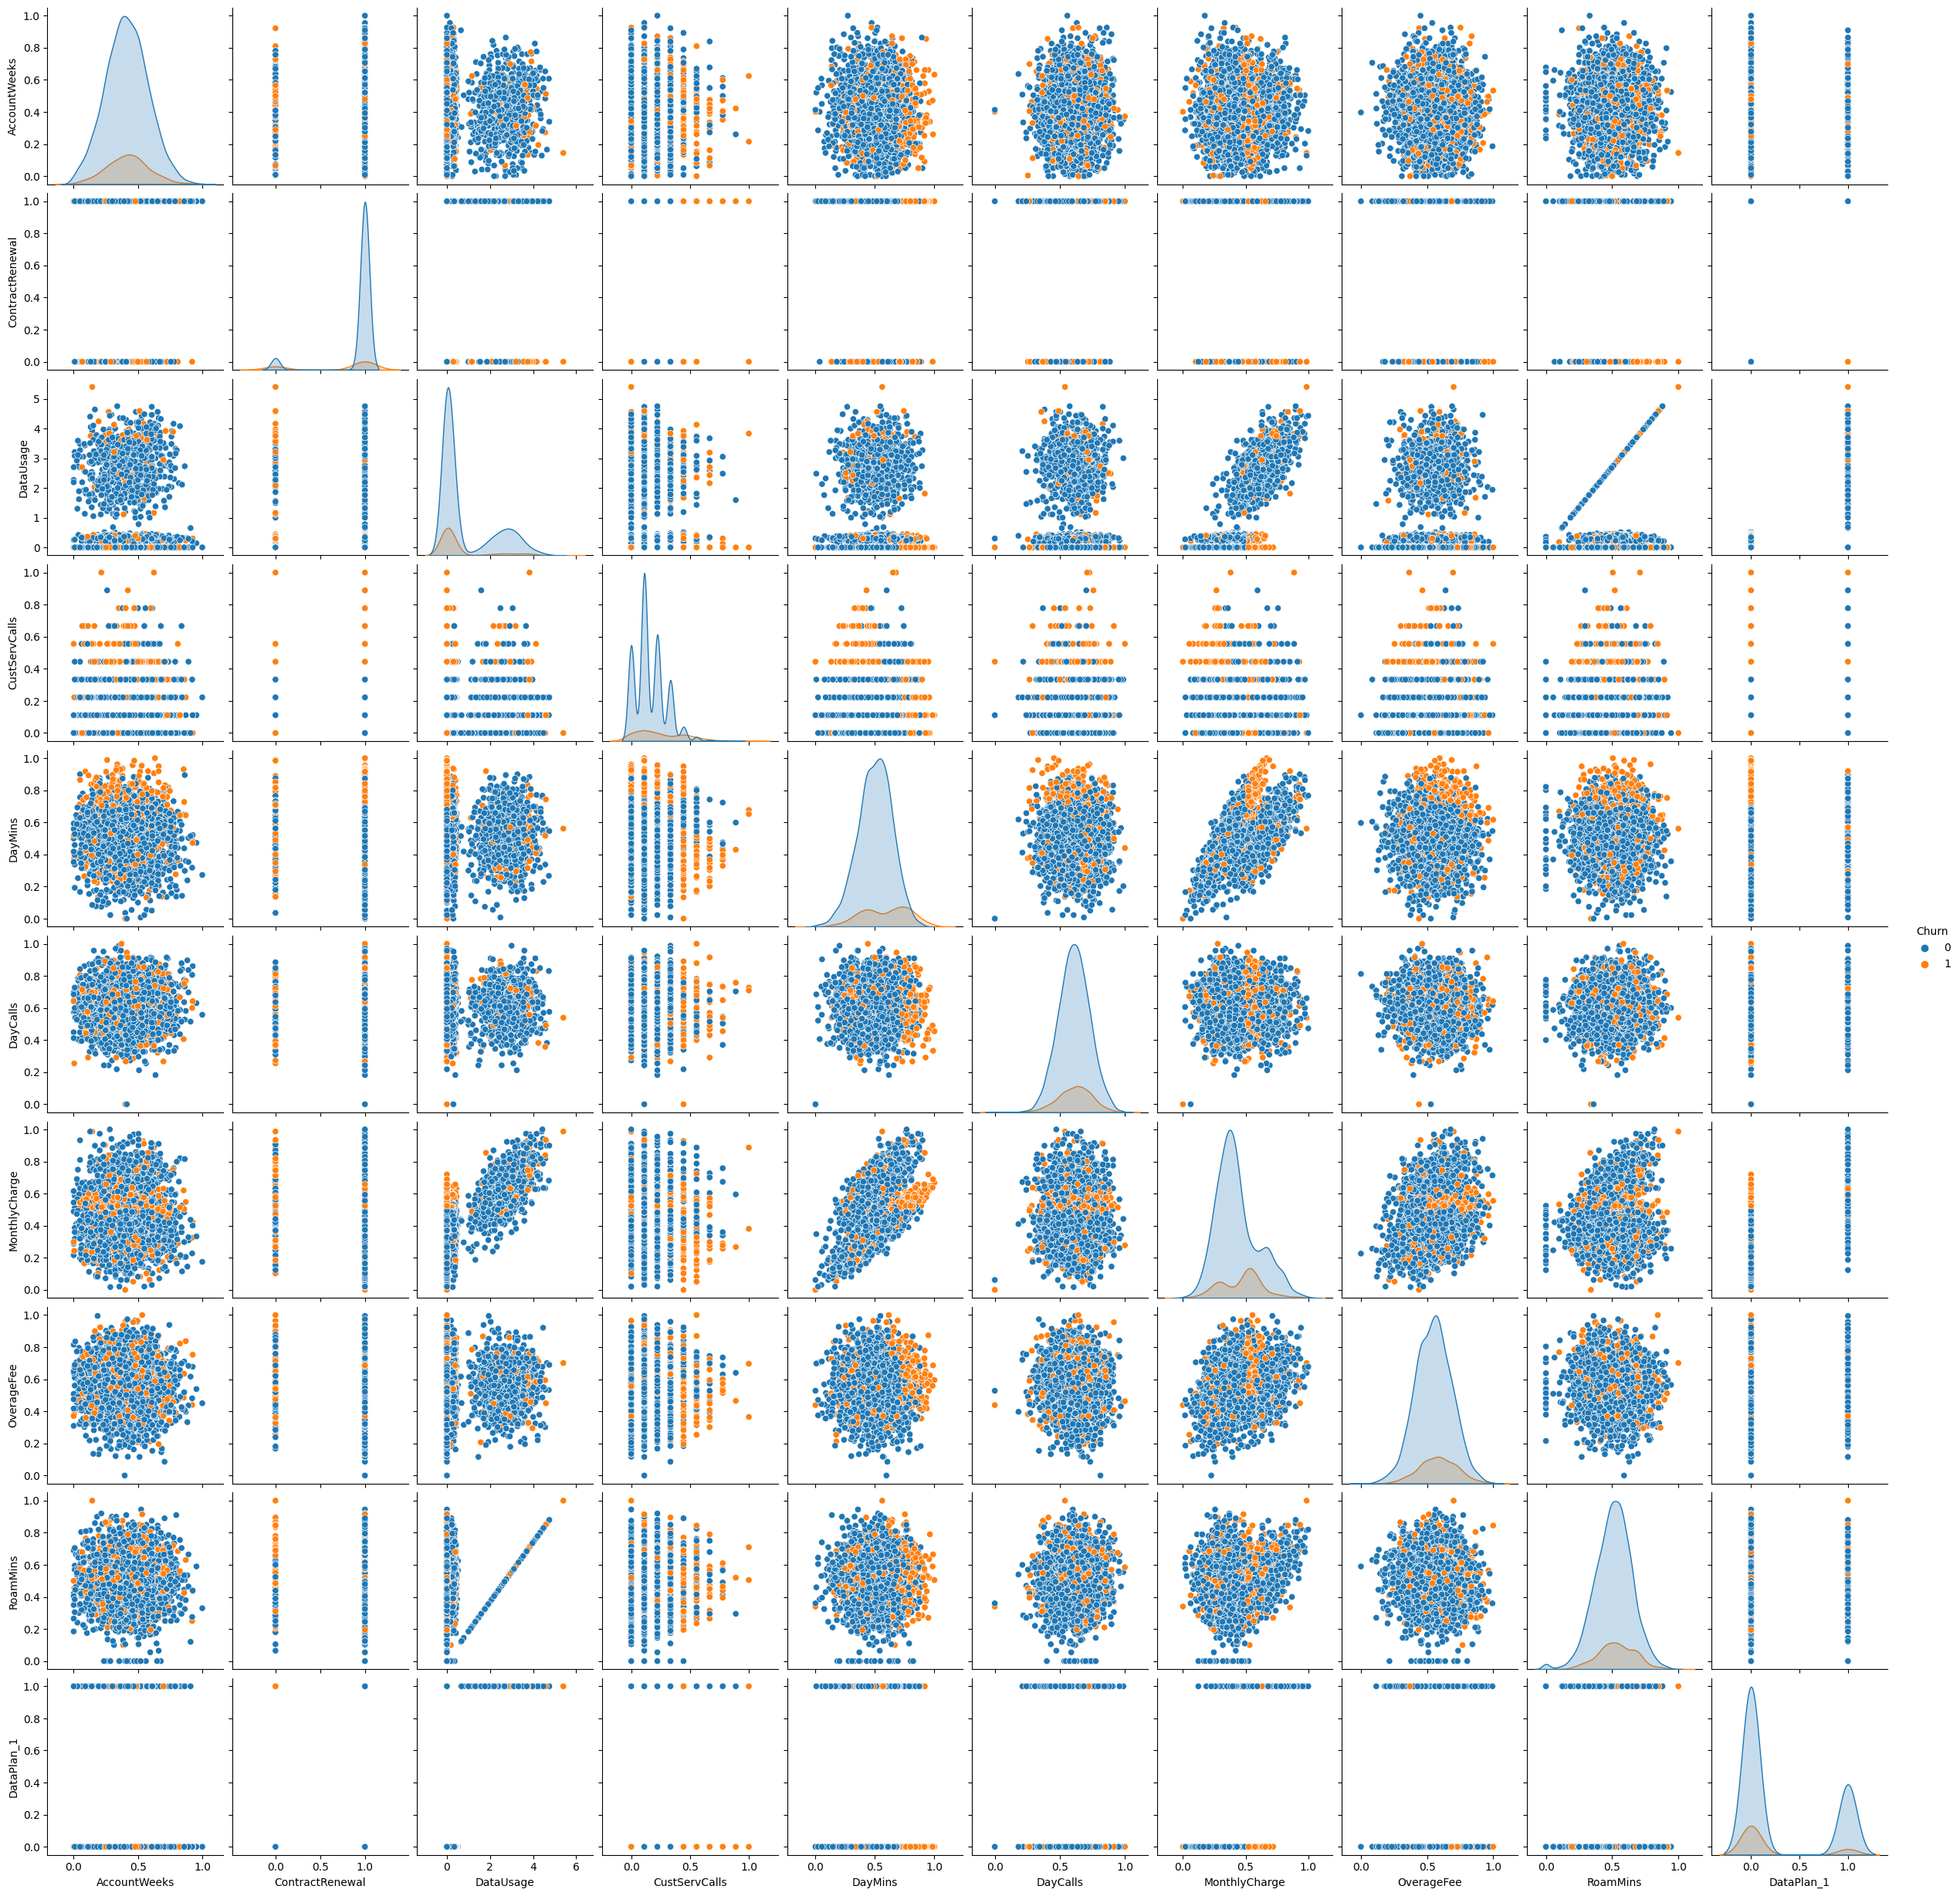

In [38]:
# Pair plot
sns.pairplot(data=df, hue='Churn')

**Feature Engineering**

In [44]:
df = df.rename(columns={'AccountWeeks': 'AccountWeeks', 'ContractRenewal': 'ContractRenewal', 
                        'DataUsage': 'DataUsage', 'CustServCalls': 'CustomerServiceCalls', 
                        'DayMins': 'DaytimeMinutes', 'DayCalls': 'DaytimeCalls', 
                        'MonthlyCharge': 'MonthlyCharge', 'OverageFee': 'OverageFee',
                        'RoamMins': 'RoamingMinutes', 'DataPlan_1': 'HasDataPlan'})

**Train & Test**

In [49]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1) 
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.ensemble import RandomForestClassifier

# create random forest classifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [51]:
# fit the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# predict on the test data
y_pred = rf.predict(X_test)


**Performance Evalution**

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Instantiate a Random Forest classifier with default hyperparameters
rf_clf = RandomForestClassifier(random_state=42)

In [54]:
# Train the classifier on the training set
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

In [55]:
# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [56]:
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))

Accuracy: 92.80%
Precision: 87.32%
Recall: 61.39%
